# import lib

In [1]:
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
df = pd.read_csv('RiyadhVillasAqar.csv')
df.head(5)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000


# EDA

In [3]:
df.shape

(46826, 26)

In [4]:
df.describe()

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578313


In [5]:
df.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs           float64
propertyAge      float64
driverRoom       float64
tent             float64
patio            float64
kitchen          float64
outdoorRoom      float64
garage           float64
duplex           float64
space              int64
apartments        object
maidRoom         float64
elevator         float64
furnihsed        float64
pool             float64
basement         float64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

### change dataType for some columns

In [6]:
replace=lambda x:str(x).replace('+','')
df['bathrooms']=df['bathrooms'].apply(replace).astype(float)
df['bathrooms'].value_counts()

5.0    32371
4.0     8781
3.0     4123
2.0     1227
1.0      324
Name: bathrooms, dtype: int64

In [7]:
replace=lambda x:str(x).replace('+','')
df['lounges']=df['lounges'].apply(replace).astype(float)
df['lounges'].value_counts()

2.0    19719
3.0    12992
1.0     7996
4.0     2832
5.0     2156
7.0       13
Name: lounges, dtype: int64

In [8]:
replace=lambda x:str(x).replace('+','')
df['apartments']=df['apartments'].apply(replace).astype(float)
df['apartments'].value_counts()

0.0     26809
1.0      9373
2.0      8435
3.0      1703
4.0       411
5.0        29
6.0        12
8.0         9
7.0         7
10.0        7
12.0        6
15.0        5
11.0        4
30.0        4
13.0        3
14.0        3
23.0        2
20.0        2
9.0         1
16.0        1
Name: apartments, dtype: int64

In [9]:
df.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges          float64
bathrooms        float64
streetWidth      float64
stairs           float64
propertyAge      float64
driverRoom       float64
tent             float64
patio            float64
kitchen          float64
outdoorRoom      float64
garage           float64
duplex           float64
space              int64
apartments       float64
maidRoom         float64
elevator         float64
furnihsed        float64
pool             float64
basement         float64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

### Drop Unused columns

In [10]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [11]:
df.head(2)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4.0,5.0,20.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3.0,5.0,20.0,1.0,0.0,1.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556


In [12]:
df.isnull().sum()

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

### Lounges Column

In [13]:
df['lounges'].isnull().sum()

1118

In [14]:
df['lounges'].value_counts()

2.0    19719
3.0    12992
1.0     7996
4.0     2832
5.0     2156
7.0       13
Name: lounges, dtype: int64

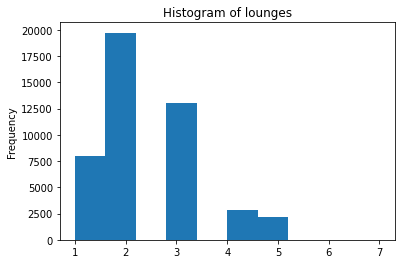

In [15]:
df['lounges'].plot(kind="hist", title="Histogram of lounges");

In [16]:
df['lounges'].var()

0.9971749884864869

In [17]:
lounges_mean = round(df['lounges'].mean())
df.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [17]:
df['lounges'] = df['lounges'].fillna(lounges_mean)
df['lounges'].isnull().sum()

0

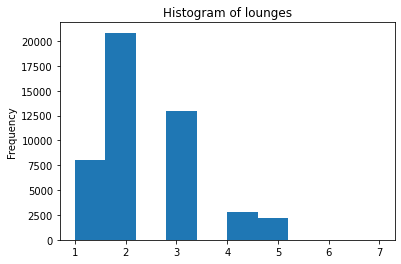

In [18]:
df['lounges'].plot(kind="hist", title="Histogram of lounges");

In [19]:
df['lounges'].var()

0.9766638290508312

In [20]:
df['lounges'].isnull().sum()

0

### streetwidth column

In [21]:
df['streetWidth'].value_counts()

20.0     19160
15.0     15392
18.0      2956
25.0      1948
16.0      1122
21.0       908
12.0       680
30.0       635
10.0       589
17.0       588
19.0       579
5.0        491
14.0       378
28.0       222
22.0       216
24.0       107
23.0        91
26.0        86
13.0        79
35.0        57
40.0        51
31.0        36
36.0        34
11.0        32
27.0        31
29.0        29
1.0         21
32.0        14
60.0        10
9.0          9
8.0          8
45.0         8
100.0        7
33.0         6
4.0          5
50.0         5
39.0         5
43.0         5
34.0         5
41.0         4
6.0          4
2.0          3
38.0         3
37.0         2
56.0         2
72.0         2
96.0         2
44.0         2
61.0         1
97.0         1
62.0         1
64.0         1
42.0         1
70.0         1
51.0         1
Name: streetWidth, dtype: int64

In [22]:
df['streetWidth'].var()

17.371107643187802

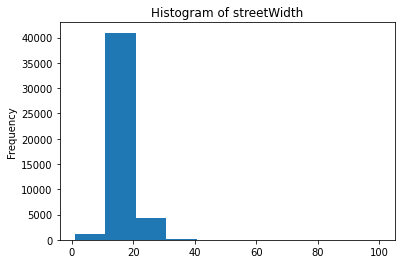

In [23]:
df['streetWidth'].plot(kind="hist", title="Histogram of streetWidth");

In [24]:
streetWidth_mean = round(df['streetWidth'].mean())
streetWidth_mean

18

In [25]:
df['streetWidth'] = df['streetWidth'].fillna(streetWidth_mean)
df['streetWidth'].isnull().sum()

0

In [26]:
df['streetWidth'].var()

17.300722987845493

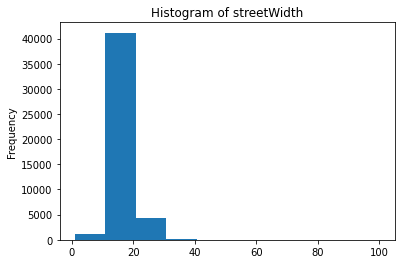

In [27]:
df['streetWidth'].plot(kind="hist", title="Histogram of streetWidth");

### price column

In [28]:
df['price'].value_counts()

1200000.0    1591
1100000.0    1440
1600000.0    1333
1300000.0    1270
1500000.0    1253
             ... 
2995000.0       1
108000.0        1
111111.0        1
1035000.0       1
855000.0        1
Name: price, Length: 672, dtype: int64

In [29]:
df['price'].var()

7739817588519.33

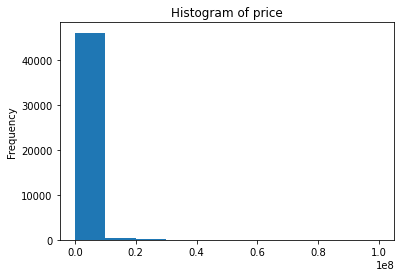

In [30]:
df['price'].plot(kind="hist", title="Histogram of price");

In [31]:
price_mean = round(df['price'].mean())
price_mean

2347636

In [32]:
df['price'] = df['price'].fillna(price_mean)
df['price'].isnull().sum()

0

In [33]:
df['price'].var()

7739487003678.742

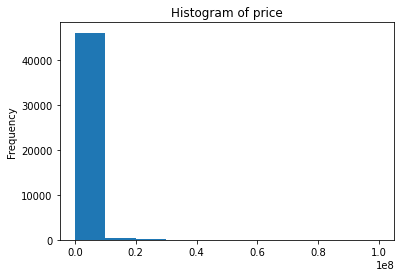

In [34]:
df['price'].plot(kind="hist", title="Histogram of price");

### square price column

In [35]:
df['square price'].value_counts()

5000.000000    1198
4000.000000     997
4166.666667     558
5500.000000     532
3333.333333     485
               ... 
4327.868852       1
2713.178295       1
9589.041096       1
6265.690377       1
3288.461538       1
Name: square price, Length: 4917, dtype: int64

In [36]:
df['square price'].var()

20392858.264719818

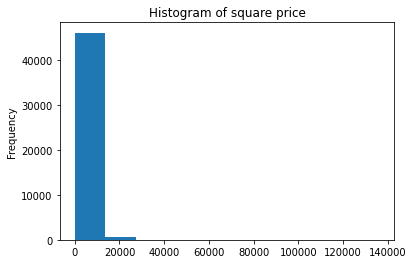

In [37]:
df['square price'].plot(kind="hist", title="Histogram of square price");

In [38]:
sqprice_mean = round(df['square price'].mean())
sqprice_mean

6088

In [39]:
df['square price'] = df['square price'].fillna(sqprice_mean)
df['square price'].isnull().sum()

0

In [40]:
df['square price'].var()

20391987.24034119

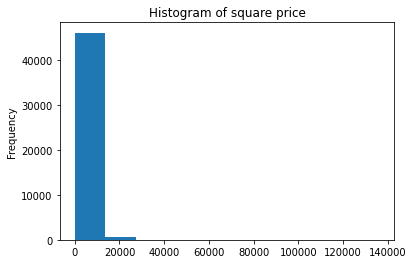

In [41]:
df['square price'].plot(kind="hist", title="Histogram of square price");

### After Handling Missing Values

In [42]:
df.isnull().sum()

front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            0
square price     0
dtype: int64

In [43]:
df['front'].value_counts() 

شمالية          12160
شرقية           10613
جنوبية          10216
غربية            6985
شمالية شرقية     1982
جنوبية غربية     1599
جنوبية شرقية     1503
شمالية غربية     1409
ثلاث شوارع        315
أربع شوارع         44
Name: front, dtype: int64

In [44]:
df['neighbourhood'].value_counts() 

 طويق             7775
 الرمال           4141
 عكاظ             3224
 النرجس           3151
 بدر              2718
                  ... 
ى محمد يى الش        1
رة النوبة            1
 البرية              1
 المرقب              1
اص                   1
Name: neighbourhood, Length: 295, dtype: int64

# Plot Heatmap

<AxesSubplot:>

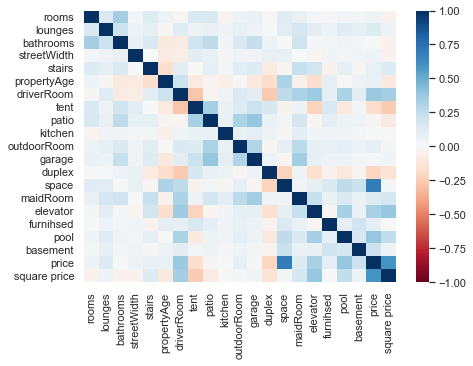

In [45]:
sns.set(rc={'figure.figsize':(7,5)}) 
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=False, fmt='g') 

In [46]:
################ This mohamed alshaikh work

SyntaxError: invalid syntax (<ipython-input-46-74f2e86cc46f>, line 1)

## المناطق التي تحتوي على دبلكسات أو عقارات بها أكثر من شقتين

In [180]:
# data frame with apartments more than 2 apartments
apdf = df[(df.apartments>2)]
# Duplex data frame
dpdf = df[df.duplex==1]

# Series of count location with apartment more than 2
x = apdf['location'].value_counts()


# Series of count location with duplex
x2 = dpdf['location'].value_counts()

In [212]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram( histfunc = 'sum',y=x.values,x=x.index, name='Apartments'))
fig.add_trace(go.Histogram(histfunc="sum", y=x2.values, x=x2.index, name="Duplex"))

fig.update_layout(
    title="العقارات الدبلكس أو التي تحتوي على أكثر من ثلاث شقق ",
    xaxis_title="مناطق الرياض",
    yaxis_title="عدد العقارات",
    template='ggplot2')

fig.show()

### العقارات التي تحتوي على شقق في أحياء شرق الرياض 

In [213]:
# Filter the dataframe with apartments more than 2 and in east of Riyadh 'شرق الرياض'
esdf = df[(df.apartments>2)]
esdf = esdf[esdf['location']=='شرق الرياض']

# Count the neighbourhood on the east riyadh
esdf1= esdf['neighbourhood'].value_counts(sort=False).to_frame('frequncy').reset_index()
esdf1['index'].mask(esdf1['frequncy'] <30 , 'إخرى', inplace=True)


In [214]:
fig = px.bar(esdf1, x='index', y='frequncy',color='index',template='ggplot2',
             labels={'frequncy':'عدد العقارات','index':'الحـي'},title=' عدد العقارات بأكثر من شقتين في شرق الرياض')
fig.show()

### اسعار العقارات بشقق في أحياء شرق الرياض

In [216]:

esdf = df[(df.apartments>2)]
esdf = esdf[esdf['location']=='شرق الرياض']

fig = px.scatter(esdf, x="space" , y='price',template='ggplot2',
                 hover_data=['neighbourhood'] ,size='apartments',
                 title='أسعار العقار بشرق الرياض التي تحتوي على أكثر من شقتين',
                labels={'price':'سعر العقار','space':'مساحة الأرض'})
fig.show()

In [231]:
# Data frame with  more than 5 rooms
rmdf = df[df.rooms>5]

In [232]:
fig = px.histogram(rmdf, x='location',color='rooms',template='ggplot2',
            labels={'count':'عدد العقارات','location':'المنطقة','rooms':'عدد الغرف'},
             title='عدد العقارات التي تحتوي على أكثر من 5 غرف')
fig.show()

In [19]:
#### DASH 
from jupyter_dash import JupyterDash
import dash_html_components as html 
import dash_core_components as dcc
from dash.dependencies import Input, Output

In [23]:
app = JupyterDash()

app.layout =html.Div(
                    children = [
                        html.H1("اسعار العقارات بشقق في الرياض"),
                        dcc.Dropdown([x for x in df['location'].unique()],'شرق الرياض', id='my-drop'),
                        dcc.Graph(id='my-graph'),
                    ])
@app.callback(
Output('my-graph', 'figure'),
Input('my-drop','value')
)
def update_graph(selected_location):
    fillter_df = df[df.apartments>2]
    fillter_df = fillter_df[fillter_df['location']==selected_location ]
    line_chart = px.scatter(fillter_df, x="space" , y='price',template='ggplot2',
                 size='apartments',
                labels={'price':'سعر العقار','space':'مساحة الأرض'})
    
    return line_chart


if __name__ == '__main__':
    app.run_server()

Dash app running on http://127.0.0.1:8050/
